<a href="https://colab.research.google.com/github/crux007/crux007/blob/main/Complete_analysis_on_house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/msc_training_dataset.csv')

In [4]:
print(train_data.info(),'\n')
print(train_data.head(),'\n')
print(train_data.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB
None 

   room  bathroom  kitchen  french_door  backyard  furnished  green_paint  \
0     3         1        2            1         1          0            1   
1     5         2        2            2         1          0            0   
2     5         2        2            2 

In [5]:
train_data.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [6]:
train_data.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [8]:
train_data.shape

(3000, 12)

In [9]:
train_data.nunique()

room              5
bathroom          2
kitchen           2
french_door       3
backyard          2
furnished         2
green_paint       2
solar_power       2
woodfloor         2
qlm_security      2
club_access       2
price           856
dtype: int64

In [10]:
train_data.isnull()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
continuous_var = train_data['price']
discrete_vars = train_data[['room', 'bathroom', 'furnished', 'kitchen', 'french_door', 'backyard', 'green_paint', 'solar_power', 'woodfloor', 'qlm_security', 'club_access']]
for var in discrete_vars:
    corr, p_value = pointbiserialr(continuous_var, train_data[var])
    print(f'Point-biserial correlation coefficient for {var}: {corr:.2f}, p-value: {p_value:.4f}')

Point-biserial correlation coefficient for room: 0.65, p-value: 0.0000
Point-biserial correlation coefficient for bathroom: 0.06, p-value: 0.0006
Point-biserial correlation coefficient for furnished: 0.45, p-value: 0.0000
Point-biserial correlation coefficient for kitchen: 0.12, p-value: 0.0000
Point-biserial correlation coefficient for french_door: 0.09, p-value: 0.0000
Point-biserial correlation coefficient for backyard: 0.13, p-value: 0.0000
Point-biserial correlation coefficient for green_paint: 0.08, p-value: 0.0000
Point-biserial correlation coefficient for solar_power: 0.32, p-value: 0.0000
Point-biserial correlation coefficient for woodfloor: 0.43, p-value: 0.0000
Point-biserial correlation coefficient for qlm_security: 0.08, p-value: 0.0000
Point-biserial correlation coefficient for club_access: 0.17, p-value: 0.0000


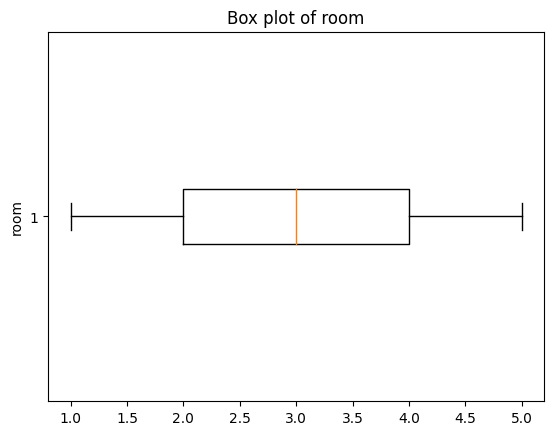

count    3000.000000
mean        2.990000
std         1.424281
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: room, dtype: float64 



In [25]:
plt.boxplot(train_data['room'],vert=False)
plt.title('Box plot of room')
plt.ylabel('room')
plt.show()
print(train_data.room.describe(),'\n')

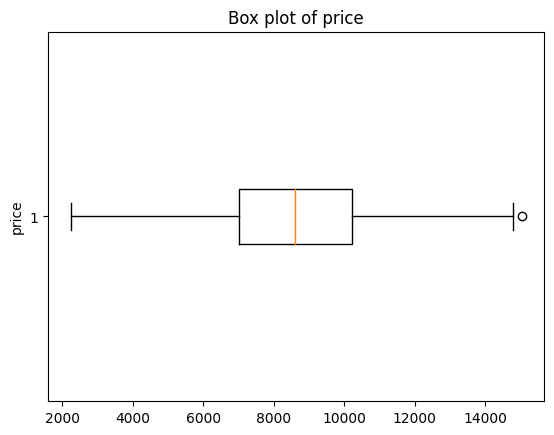

count     3000.000000
mean      8606.600000
std       2216.248563
min       2235.000000
25%       7005.000000
50%       8615.000000
75%      10215.000000
max      15035.000000
Name: price, dtype: float64 



In [24]:
plt.boxplot(train_data['price'],vert=False)
plt.title('Box plot of price')
plt.ylabel('price')
plt.show()
print(train_data.price.describe(),'\n')

<Axes: xlabel='price', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



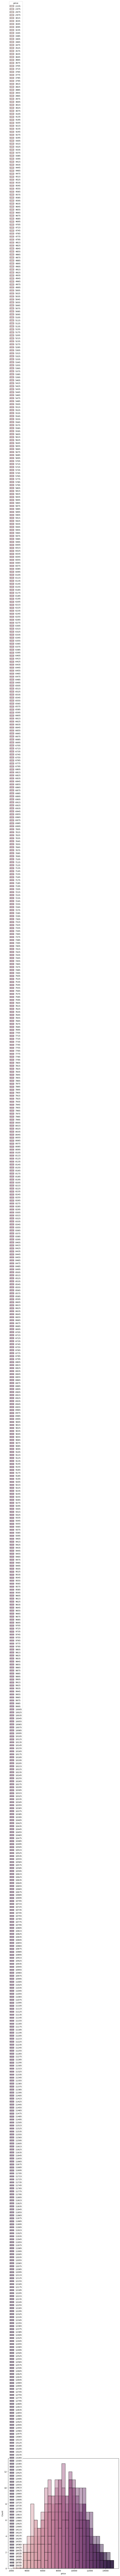

In [30]:
plt.figure(figsize = (10, 10))
sns.histplot(x='price', hue = 'price', data = train_data, kde=True)

In [33]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [34]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
best_score = 0
best_max_depth = 0
for max_depth in range(1, 11):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train_scaled, y_train)

    score = model.score(X_train_scaled, y_train)

    if score > best_score:
        best_score = score
        best_max_depth = max_depth


In [36]:
print("Best max_depth:", best_max_depth)
print("Best score:", best_score)

Best max_depth: 10
Best score: 0.9932257337773296


In [37]:
test_data = pd.read_csv('/content/drive/MyDrive/msc_testing_dataset.csv')

In [38]:
X_test = test_data.iloc[:, :-1]

In [39]:
X_test_scaled = scaler.transform(X_test)

In [40]:
model = DecisionTreeRegressor(max_depth=best_max_depth)

In [41]:
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10)

In [42]:
y_pred = model.predict(X_test_scaled)
print(y_pred)

[ 5287.          7737.5        11305.          8845.
 10922.5        11591.         11768.33333333  6948.33333333
  8100.          5900.          8989.          8665.
  7065.         11289.          7767.22222222  9605.
  8885.         13028.33333333 10185.          6880.
  8845.          7475.          7021.66666667  3890.
 10335.          7526.11111111  8067.          9325.
  6795.          9195.          6675.          9998.33333333
 10455.          8292.14285714  7600.         10355.
  8605.         10968.33333333  9337.         13255.
  6761.66666667  5145.         10100.          8902.5
 11335.          6175.          4175.         11440.
  9198.33333333  5145.         11485.         10777.5
  4768.33333333  8190.         13970.          9440.
  5945.          8735.         10225.          7887.
  7715.         13695.          7635.          8440.
 12965.          8067.         11215.         10495.
 10165.          5849.28571429  8030.         12275.
  4175.          6335.      

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score

In [44]:
mse = mean_squared_error(test_data.iloc[:, -1], y_pred)
mae = mean_absolute_error(test_data.iloc[:, -1], y_pred)
r2 = r2_score(test_data.iloc[:, -1], y_pred)
f1 = f1_score(test_data.iloc[:, -1] > 7000, y_pred > 7000, average='binary')

In [45]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("F1-score:", f1)

Mean Squared Error: 131098.21521781205
Mean Absolute Error: 288.24034135145246
R-squared: 0.9733223054024248
F1-score: 0.9756738987508218


In [46]:
importances = model.feature_importances_
for i, col in enumerate(X_train.columns):
    print(f"{col}: {importances[i]:.3f}")

room: 0.430
bathroom: 0.003
kitchen: 0.010
french_door: 0.006
backyard: 0.015
furnished: 0.202
green_paint: 0.006
solar_power: 0.115
woodfloor: 0.177
qlm_security: 0.008
club_access: 0.027


In [48]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)
pos = np.arange(sorted_idx.shape[0]) + .5

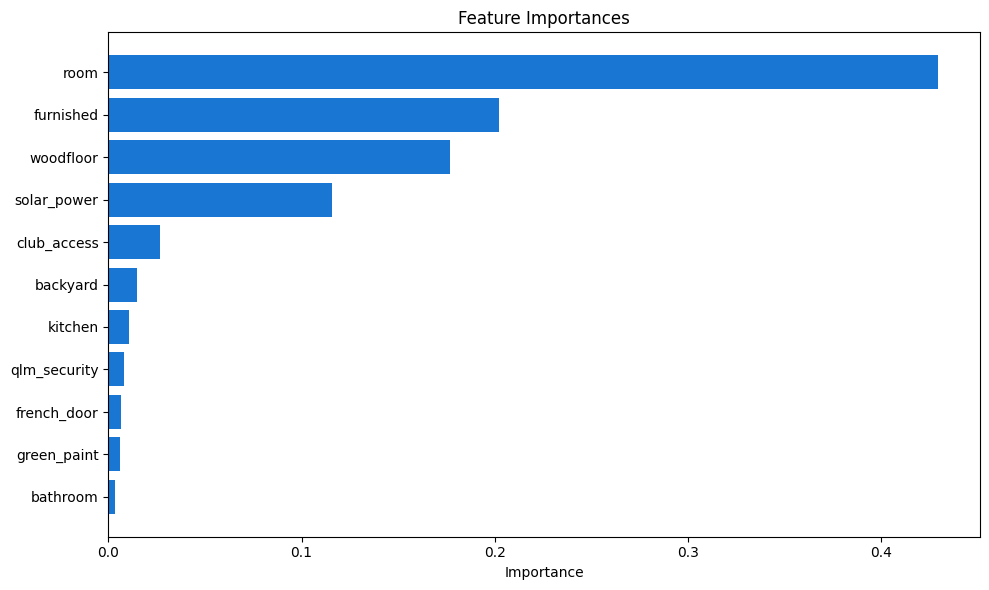

In [49]:
plt.figure(figsize=(10, 6))
plt.barh(pos, importances[sorted_idx], align='center', color='#1976D2')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [50]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=ecbd68972e37f504dd4898dcf5f3cb029d02e223a9d2f5a88010fc8a55d61765
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [51]:
import lime
import lime.lime_tabular

In [52]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['price'],
    mode='regression'
)

In [53]:
i = 42
x = X_test.iloc[[i]]

In [54]:
exp = explainer.explain_instance(
    data_row=x.values[0],
    predict_fn=model.predict,
    num_features=len(X_train.columns)
)

In [55]:
print(exp.as_list())

[('furnished <= 0.00', -2044.098944090951), ('0.00 < woodfloor <= 1.00', 1889.9545713683212), ('0.00 < solar_power <= 1.00', 1502.4041085070073), ('club_access <= 0.00', -684.200502858911), ('backyard <= 0.00', -466.57314836268307), ('1.00 < kitchen <= 2.00', 388.7915756137284), ('qlm_security <= 0.00', -354.07510591584645), ('french_door <= 1.00', -272.64068970068524), ('0.00 < green_paint <= 1.00', 213.16453129433933), ('1.00 < bathroom <= 2.00', 149.3150884889796), ('3.00 < room <= 4.00', -3.3585240951426196)]


In [56]:
weights = pd.DataFrame(exp.as_list(), columns=['Feature', 'Weight'])
print(weights)

                       Feature       Weight
0            furnished <= 0.00 -2044.098944
1     0.00 < woodfloor <= 1.00  1889.954571
2   0.00 < solar_power <= 1.00  1502.404109
3          club_access <= 0.00  -684.200503
4             backyard <= 0.00  -466.573148
5       1.00 < kitchen <= 2.00   388.791576
6         qlm_security <= 0.00  -354.075106
7          french_door <= 1.00  -272.640690
8   0.00 < green_paint <= 1.00   213.164531
9      1.00 < bathroom <= 2.00   149.315088
10         3.00 < room <= 4.00    -3.358524
